__<h2>Importent Setup and library:</h2>__

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from keras.models import Sequential

from PIL import Image
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pathlib
data_dir = "/content/drive/MyDrive/chest_xray data set"
data_dir_train = "/content/drive/MyDrive/chest_xray data set/train"
data_dir_validation = "/content/drive/MyDrive/chest_xray data set/test"

Data cleaning

In [5]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/chest_xray data set"
image_extensions = [".png", ".svg", ".gif", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

<ipython-input-5-f79e6b96aacc>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
import tensorflow as tf


In [7]:


img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  # Ensure data_dir_train is defined
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 5216 files belonging to 2 classes.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_validation,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


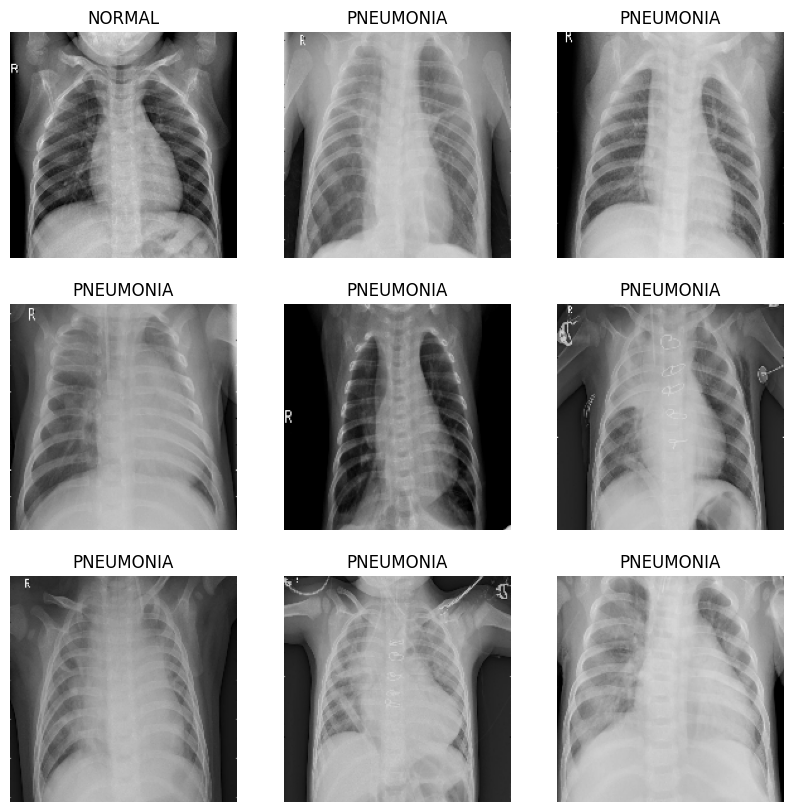

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

img_height, img_width = 180, 180
num_classes = 2

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Updated this line
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes)
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.8239 - loss: 0.3688 - val_accuracy: 0.7452 - val_loss: 0.8193
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9632 - loss: 0.1046 - val_accuracy: 0.7388 - val_loss: 1.1912
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9711 - loss: 0.0798 - val_accuracy: 0.7612 - val_loss: 1.0604


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


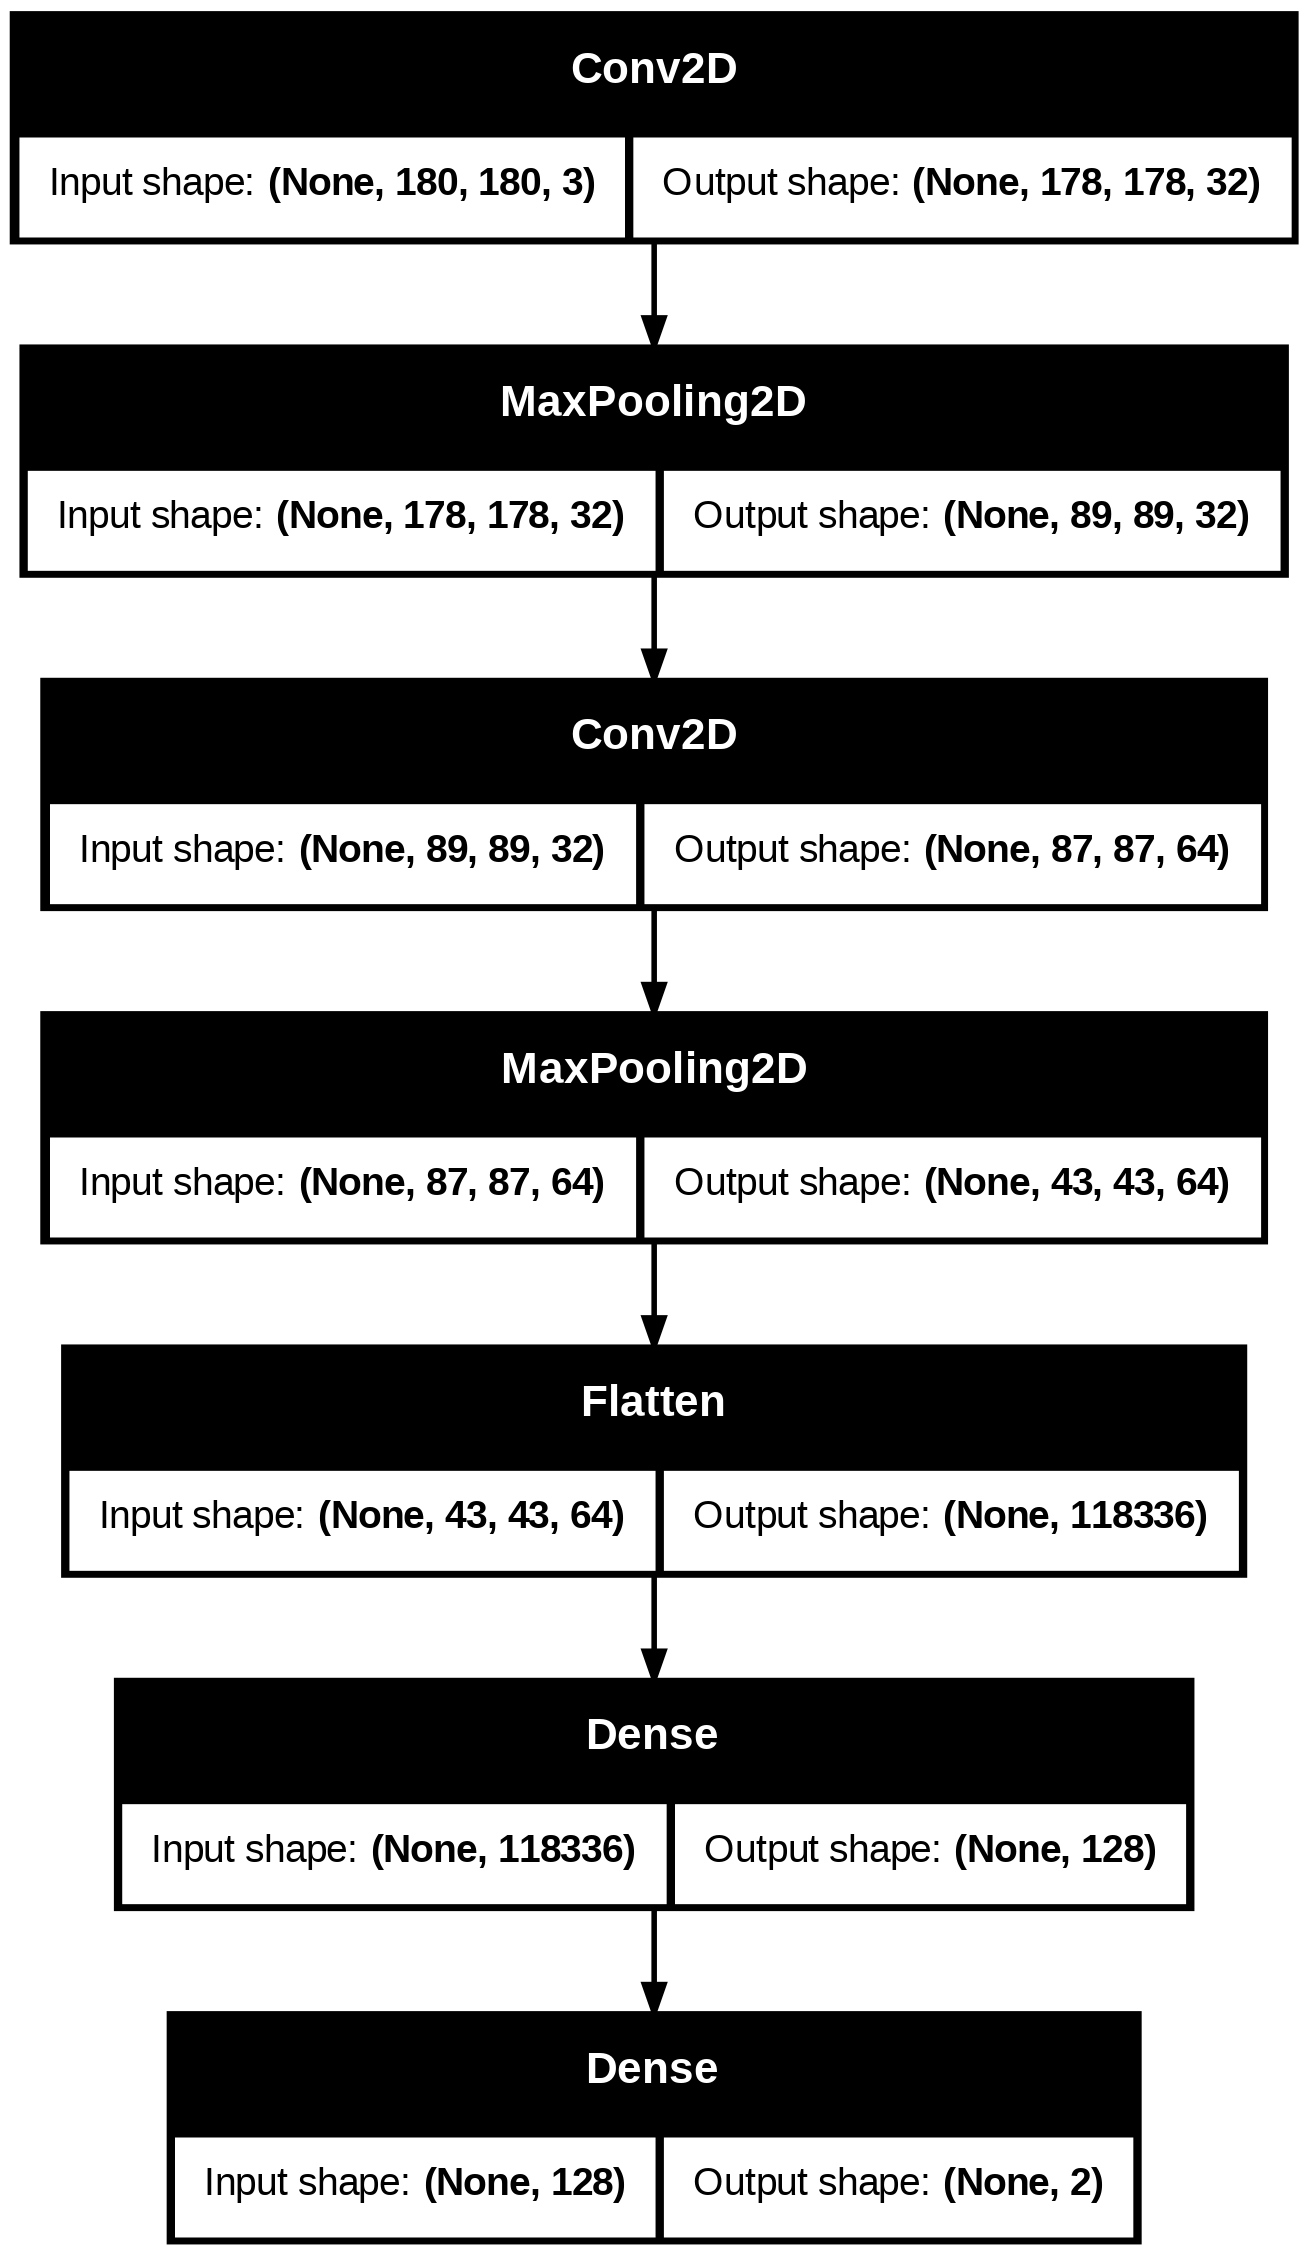

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define activation function correctly
activation_function = "relu"  # Change to a valid activation function

# Build the model correctly
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation=activation_function, input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation=activation_function),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation=activation_function),
    layers.Dense(2, activation="softmax")  # Output layer for classification
])

# Correct way to plot the model
tf.keras.utils.plot_model(model, show_shapes=True)  # ✅ Correct usage


In [15]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", tf.keras.__version__)


TensorFlow Version: 2.18.0
Keras Version: 3.8.0


In [21]:
# OR save in legacy `.h5` format for compatibility
model.save("models/chest_xray_model.h5")
from tensorflow import keras

In [22]:
# OR load `.h5` model (for older versions)
model = keras.models.load_model("models/chest_xray_model.h5")